/tmp/ipykernel_1162182/3260167487.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
/tmp/ipykernel_1162182/3260167487.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)


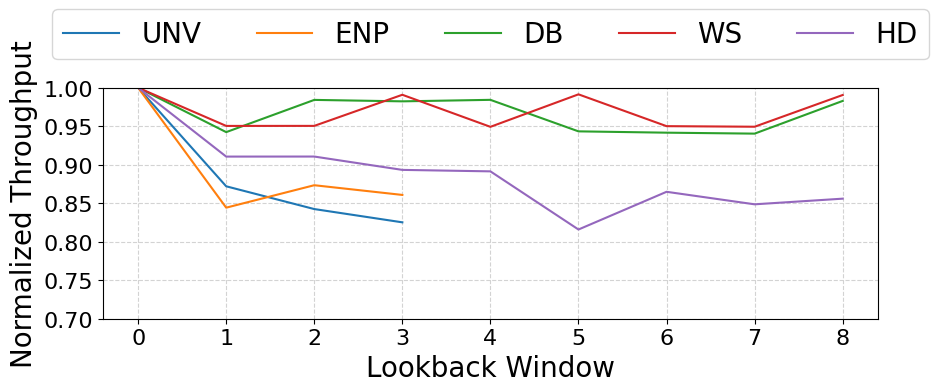

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

trafficnamearr = ["unv1","prv1","cluster_a","cluster_b","cluster_c"]
Harr = [3,3,8,8,8]
intervalarr = [[4,7],[4,7],[24,48],[24,48],[24,48]]
homedir = "/home/annzhou"

namearr = ["UNV","ENP","DB","WS","HD"]

fig,ax = plt.subplots(figsize=(10,3))
for itrafficname,trafficname in enumerate(trafficnamearr):
    resultfile = f"{homedir}/DRing/src/emp/datacentre/experiments/temporal/{trafficname}.txt"
    H = Harr[itrafficname]
    intervalstart = intervalarr[itrafficname][0]
    intervalend = intervalarr[itrafficname][1]

    datadict = dict()
    with open(resultfile,'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            solveinterval = int(tokens[0])
            computeinterval = int(tokens[1])
            throughput = float(tokens[2])
            datadict[f"{solveinterval},{computeinterval}"] = throughput

    plotlist = list()
    for h in range(H+1):
        throughput = 0
        for solveinterval in range(intervalstart,intervalend):
            throughput += datadict[f"{solveinterval},{solveinterval-h}"] / datadict[f"{solveinterval},{solveinterval}"]
        plotlist.append(throughput/(intervalend-intervalstart))
    
    plt.plot(range(H+1),plotlist,label=namearr[itrafficname])

plt.xlabel('Lookback Window',fontsize=20)
plt.ylabel('Normalized Throughput',fontsize=20)
plt.ylim(0.7,1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
plt.grid(color='lightgrey', linestyle='dashed', axis="both")
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.4), fontsize=20)
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_temporal.pdf", dpi=600, bbox_inches='tight')
plt.show()